In [ ]:
# You may need to install this package first
#pip install matplotlib-venn

## Create Venn Diagrams

### Potential source of data:
[Generate lists of Pokemon by type](https://pokemondb.net/tools/text-list)


Input elements for each set (separated by spaces):

--- Results ---
water: {'Gyarados', 'Lapras', 'Omanyte', 'Wartortle', 'Squirtle', 'Tentacool', 'Tentacruel', 'Poliwag', 'Poliwhirl', 'Seadra', 'Seaking', 'Kabuto', 'Staryu', 'Kingler', 'Golduck', 'Blastoise', 'Magikarp', 'Omastar', 'Starmie', 'Slowbro', 'Dewgong', 'Horsea', 'Seel', 'Krabby', 'Slowpoke', 'Poliwrath', 'Psyduck', 'Shellder', 'Cloyster', 'Goldeen', 'Kabutops', 'Vaporeon'} -> count = 32
ice: {'Lapras', 'Cloyster', 'Articuno', 'Jynx', 'Dewgong'} -> count = 5
flying: {'Gyarados', 'Zapdos', 'Pidgeot', 'Scyther', 'Pidgeotto', 'Zubat', 'Doduo', 'Dragonite', 'Moltres', 'Spearow', 'Articuno', "Farfetch'd", 'Golbat', 'Fearow', 'Pidgey', 'Aerodactyl', 'Charizard', 'Dodrio', 'Butterfree'} -> count = 19
Union (water∪ice∪flying): {'Gyarados', 'Lapras', 'Zapdos', 'Omanyte', 'Pidgeot', 'Scyther', 'Pidgeotto', 'Wartortle', 'Squirtle', 'Tentacool', 'Tentacruel', 'Zubat', 'Doduo', 'Poliwag', 'Poliwhirl', 'Seadra', 'Seaking', 'Kabuto', 'Dr

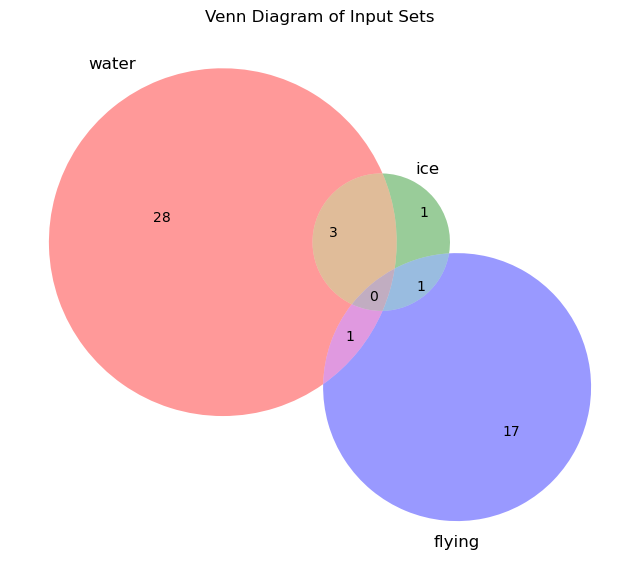

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def input_set(name):
    s = input(f"Enter elements of set {name} separated by spaces: ")
    return set(item.strip() for item in s.split() if item.strip())

def interactive_venn_demo():
    # Input labels
    label_A = input("Enter label for Set A: ") or "A"
    label_B = input("Enter label for Set B: ") or "B"
    label_C = input("Enter label for Set C: ") or "C"

    # Input sets
    print("\nInput elements for each set (separated by spaces):")
    A = input_set(label_A)
    B = input_set(label_B)
    C = input_set(label_C)

    # Define universe as union of all + optional extra elements
    universe_input = input("\nEnter universe elements separated by spaces (or leave blank for union of all sets): ")
    if universe_input.strip():
        universe = set(item.strip() for item in universe_input.split() if item.strip())
    else:
        universe = A | B | C

    # Compute unions and intersections
    union_set = A | B | C
    triple_intersection = A & B & C
    pairwise_intersections = {
        f"{label_A}∩{label_B}": A & B,
        f"{label_A}∩{label_C}": A & C,
        f"{label_B}∩{label_C}": B & C
    }
    complement_set = universe - union_set

    # Addition principle check
    if A.isdisjoint(B) and A.isdisjoint(C) and B.isdisjoint(C):
        total_by_addition = len(A) + len(B) + len(C)
        addition_msg = "Sets are disjoint → addition principle applies."
    else:
        total_by_addition = len(union_set)
        addition_msg = "Sets overlap → addition principle does NOT apply directly."

    # Print results
    print("\n--- Results ---")
    print(f"{label_A}: {A} -> count = {len(A)}")
    print(f"{label_B}: {B} -> count = {len(B)}")
    print(f"{label_C}: {C} -> count = {len(C)}")
    print(f"Union ({label_A}∪{label_B}∪{label_C}): {union_set} -> count = {len(union_set)}")
    print(f"Triple Intersection ({label_A}∩{label_B}∩{label_C}): {triple_intersection} -> count = {len(triple_intersection)}")
    for k, v in pairwise_intersections.items():
        print(f"{k}: {v} -> count = {len(v)}")
    print(f"Complement (universe - union): {complement_set} -> count = {len(complement_set)}")
    print(f"Total count (addition principle check): {total_by_addition}")
    print(addition_msg)

    # Venn diagram
    plt.figure(figsize=(8,8))
    venn3([A, B, C], set_labels=(label_A, label_B, label_C))
    plt.title("Venn Diagram of Input Sets")
    plt.show()

# Run the interactive demo
interactive_venn_demo()


## Create power sets

In [2]:
# Power Set Generator
from itertools import combinations

# since sets can't hash other sets we use tuples (but pretend they represent sets).

def power_set(original_set: list) -> list:
    # start with sets of size 0, then 1, then 2, ... then n
    power_set = {()} # set of size 0
    for i in range(1, len(original_set) + 1):
        # we are looking for every possible combination set of size i
        for comb in combinations(original_set, i):
            power_set.add(comb)
            
    return set(power_set)

def convert_sets_to_strings(in_set: set) -> str:
    return str(in_set).replace("(", "{").replace(")", "}").replace(",}", "}")

In [3]:
N = 3 # number of total sets you want (just note this takes exponential runtime so continuing past s2 with be slow!)
s = {1,2} # |s1| = 2
print(f"s{1} = {convert_sets_to_strings(s)}\n|s{1}| = {len(s)}")

for i in range(1, N):
    og_length = len(s)
    s = power_set(s)
    print(
    f"{'P(' * i}s{i}{')' * (i - 1)} = {convert_sets_to_strings(s)}\n"
    f"|s{i}| = {len(s)} = 2^{og_length}"
)


s1 = {1, 2}
|s1| = 2
P(s1 = {{1}, {1, 2}, {}, {2}}
|s1| = 4 = 2^2
P(P(s2) = {{{1, 2}, {}}, {{}, {2}}, {{1}}, {{1}, {2}}, {{2}}, {{1}, {1, 2}, {}, {2}}, {{1}, {1, 2}, {2}}, {{1, 2}, {}, {2}}, {{1, 2}, {2}}, {{1}, {}}, {{1}, {1, 2}}, {{1}, {1, 2}, {}}, {{}}, {{1}, {}, {2}}, {{1, 2}}, {}}
|s2| = 16 = 2^4
